In [160]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### ADDING ALL IMAGES IN ARRAY

In [41]:
images=[]

top_left=cv2.imread("./top_left.jpg")

images.append(top_left)

top_right=cv2.imread("./top_right.jpg")

images.append(top_right)

bottom_left=cv2.imread("./bottom_left.jpg")

images.append(bottom_left)

bottom_right=cv2.imread("./bottom_right.jpg")

images.append(bottom_right)

center=cv2.imread("./center.jpeg")

images.append(center)

### ADING BORDER TO THE IMAGES

In [253]:
def adding_boarder(img):
    h, w = img.shape[:2]
    
    img=cv2.resize(img,(200,200))
    
    h,w=img.shape[0:2]
    
    base_size=h+40,w+40,3
    
    # make a 3 channel image for base which is slightly larger than target img
    
    base=np.zeros(base_size,dtype=np.uint8)
    
    cv2.rectangle(base,(0,0),(w+40,h+40),(0,0,0),30) # really thick white rectangle
    
    base[20:h+20,20:w+20]=img # this works
    
    return base

In [254]:
border_images=[]
for img in images:
    border_images.append(adding_boarder(img))

In [208]:
def stacking_img(img1,img2,direction):
    if direction=='h':
        return np.hstack((img1,img2))
    else:
        return np.vstack((img1,img2))

(220, 220, 3)
(210, 190, 3)
(210, 220, 3)
(220, 220, 3)
(220, 220, 3)


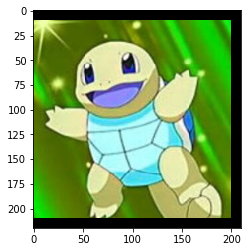

In [93]:
# 1. top_left 2. top_right 3. bottom_left 4. bottom_right 5. center
top_r=border_images[1][0:210,10:220]
bottom_l=border_images[2][10:220]
bottom_r=border_images[3]
plt.imshow(bottom_r[0:220,10:220])

# checking shape
for sp in border_images:
    print(sp.shape)

#hori=stacking_img(border_images[0],border_images[1],'h')
#veri=stacking_img(border_images[2],border_images[3],'h')
#final=stacking_img(hori,veri,'v')
#plt.imshow(final)


In [106]:
im=np.zeros((430,430,3),np.uint8)

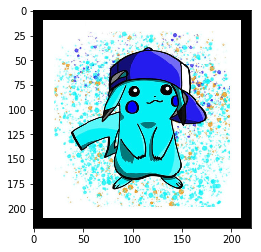

In [112]:
plt.imshow(border_images[0])

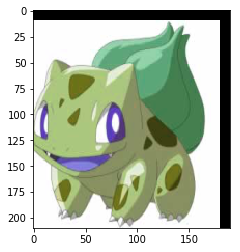

In [113]:
plt.imshow(border_images[1])

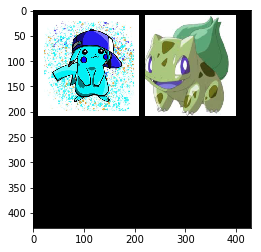

In [129]:
im=np.zeros((430,430,3),np.uint8)

im[0:220,0:220]=border_images[0]

im[0:210,220:410]=border_images[1]
plt.imshow(im)

## Final 

In [255]:
def same_sizes(img):
    return cv2.resize(img,(200,200))
same_size=[]
for img in images:
    same_size.append((same_sizes(img)))

In [270]:
final=np.zeros((430,430,3),np.uint8)
final[10:210,10:210]=same_size[0]
final[10:210,220:420]=same_size[1]
final[220:420,10:210]=same_size[2]
final[220:420,220:420]=same_size[3]
border_images[4]=cv2.resize(border_images[4],(120,120))
final[155:275,155:275]=border_images[4]
cv2.imshow("Final image",final)
cv2.waitKey(0)
cv2.destroyAllWindows()

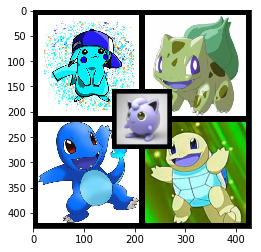

In [272]:
plt.imshow(final)

In [276]:
#df=pd.DataFrame({'r':final[:,0:0],'g':final[:,1:1],'b':final[:,2:2]})
#df.to_csv("submission.csv",index=False)
width,height,c=final.shape

with open('submission.csv', 'w+') as f:
    f.write('r,g,b\n')
 
  #read the details of each pixel and write them to the file
    for x in range(width):
        for y in range(height):
            b = final[x,y][0]
            g = final[x,y][1]
            r = final[x,y][2]
            f.write('{0},{1},{2}\n'.format(r,g,b))



In [223]:
 b,g,r = cv2.split(final)

In [237]:
border_images[3].shape

(220, 220, 3)